In [1]:
# FILE NAME: LDA
# PROGRAMMER: VG6
# DATE: 02.03.2020
# Purpose: To perform LDA analisys and find most relecant classes


In [21]:
# importing modules
import nltk
import re
from gensim.corpora.dictionary import Dictionary
import numpy as np
from gensim.models.ldamulticore import LdaMulticore
from gensim.models import CoherenceModel
from gensim import corpora
import pyLDAvis.gensim
import pandas as pd
from nltk.stem import SnowballStemmer
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# reading data from the file
data = pd.read_csv('online_edu_full.csv', index_col=0)

# getting russian stop words
stop_words = nltk.corpus.stopwords.words('russian')

# initializing russian stemmer
stemmer = SnowballStemmer('russian')

In [7]:
# filling nan values with ''
data['Ключевые слова содержания'] = data['Ключевые слова содержания'].fillna('')

# splitting key raw sentences to distinct sentences
data['Ключевые предложения содержания'] = data['Ключевые слова содержания'].apply(lambda x: str(x))
data['Ключевые предложения содержания'] = data['Ключевые слова содержания'].apply(lambda x: [word_sent for word_sent in x.split(', ')])

# getting distinct words to every record to feed it in Word2Vec
data['Предложения'] = data['Ключевые предложения содержания'].apply(lambda x:
                                                                   [word for sent in x for word in sent.split()])
# cleaning out of stop words
data['Предложения'] = data['Предложения'].apply(lambda x: [word for word in x if word not in stop_words])

# performing stemming
data['Предложения со стеммингом'] = data['Предложения'].apply(lambda x: [stemmer.stem(word) for word in x])

# initializing course key sentences list 
course_key_sent = []

# cleaning sentences out of stop words and leave only sentences
# that consists of 2 or more words
for course in data['Ключевые предложения содержания']:
    course_s = []
    for key_sent in course:
        new_course_desc = []
        for stop_word in stop_words:
            key_sent = re.sub(r'\b' + stop_word + r'\b', '', key_sent)
            
        if len(key_sent.split()) >= 2:
            new_course_desc.append(key_sent)
            
        course_s.append(new_course_desc)
    course_key_sent.append(course_s)
    
# initializing stemmed sentences list
stemmed_course_key_sent = []

# performing stemming
for course in course_key_sent:
    sentences = []
    for sent in course:
        words = []
        for word in sent:
            new_word = stemmer.stem(word)
            words.append(new_word)
            
        sentences.append(' '.join(words))
        
    stemmed_course_key_sent.append(sentences)
    
# initalizing new table in dataframe
data['Предложения со стеммингом 2'] = stemmed_course_key_sent

# getting all sentences and words in one list
text_stemmed = data['Предложения со стеммингом 2'].tolist() + data['Предложения со стеммингом'].tolist()

In [8]:
# creating dictionary from all texts
dictionary = Dictionary(text_stemmed)
dictionary.filter_extremes(no_below=10, no_above=0.1)

# creating corpus 
corpus = [dictionary.doc2bow(doc) for doc in text_stemmed]

# printing inforamtion 
print('Unique tokens: %d' % len(dictionary))
print('Docs number: %d' % len(corpus))

Unique tokens: 438
Docs number: 1428


In [35]:
# creating lda model (BEST LDA MODEL)
model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=32)

# visualizing data
pyLDAvis.enable_notebook()
categorical_data = pyLDAvis.gensim.prepare(model, corpus, dictionary)

/home/blakexdd/Documents/Github/Collecting_data_openedu/venv/lib/python3.8/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [36]:
categorical_data

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
7      0.156850 -0.041885       1        1  8.595683
10    -0.074038  0.002103       2        1  6.596568
11    -0.065427  0.027893       3        1  6.307173
0     -0.054014 -0.003927       4        1  4.829640
2     -0.063614  0.030175       5        1  4.256382
12     0.074597  0.042947       6        1  4.213449
26     0.045752  0.024203       7        1  4.122609
31    -0.008314  0.024156       8        1  3.741506
4     -0.108761 -0.118181       9        1  3.629635
13     0.062644  0.027110      10        1  3.355531
14    -0.041124 -0.021743      11        1  3.291970
30    -0.130631  0.028129      12        1  3.277453
9     -0.070208 -0.042392      13        1  3.082832
15    -0.057734 -0.087907      14        1  3.070709
19    -0.005174  0.036805      15        1  2.932622
5     -0.013321 -0.013270      16        1  2.923517
25    -0.087566 -0.002276      17        1  2.807521
18     0.045158  0.085289      18        1  2.611280
23     0.022595 -0.018359      19        1  2.586801
17     0.049031  0.007775      20        1  2.554454
1     -0.110908 -0.012927      21        1  2.510924
22     0.006923  0.022138      22        1  2.483120
28     0.077778  0.083872      23        1  2.120262
24     0.069845 -0.095175      24        1  2.091865
6     -0.010900  0.139479      25        1  1.974054
27    -0.016390 -0.085060      26        1  1.798596
21     0.086223  0.033414      27        1  1.684795
20     0.027340  0.039166      28        1  1.464359
3     -0.055628  0.110916      29        1  1.434421
8      0.138267 -0.049761      30        1  1.328949
16     0.050519 -0.049942      31        1  1.256934
29     0.060229 -0.122762      32        1  1.064387, topic_info=    Category        Freq      Term       Total  loglift  logprob
314  Default  191.000000      наук  191.000000  30.0000  30.0000
321  Default   94.000000   философ   94.000000  29.0000  29.0000
131  Default  150.000000      прав  150.000000  28.0000  28.0000
210  Default  124.000000   культур  124.000000  27.0000  27.0000
232  Default  259.000000  управлен  259.000000  26.0000  26.0000
..       ...         ...       ...         ...      ...      ...
246  Topic32    1.833542    времен   67.743881   0.9333  -4.6624
9    Topic32    2.342575      теор  158.422775   0.3288  -4.4174
38   Topic32    2.159006     функц  169.810532   0.1777  -4.4990
17   Topic32    2.022433     метод  241.397598  -0.2394  -4.5643
66   Topic32    1.849469    основн  245.973557  -0.3476  -4.6537

[1511 rows x 6 columns], token_table=      Topic      Freq Term
term                      
387       1  0.051625    -
387       2  0.051625    -
387       3  0.154874    -
387       4  0.051625    -
387       5  0.051625    -
...     ...       ...  ...
190      27  0.016001    –
190      28  0.048003    –
190      29  0.016001    –
190      30  0.032002    –
190      31  0.064004    –

[6544 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 11, 12, 1, 3, 13, 27, 32, 5, 14, 15, 31, 10, 16, 20, 6, 26, 19, 24, 18, 2, 23, 29, 25, 7, 28, 22, 21, 4, 9, 17, 30])

In [12]:
def compute_coherence(dictionary, corpus, texts, limit, start=2, step=3):
    # inializing coherence values and models list
    coherence_values = []
    model_list = []
    
    # getting model and coherence values for each model
    for num_topics in range(start, limit, step):
        # initializing lda model
        model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        
        # initlaizing coherence model
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
        
    return model_list, coherence_values
        

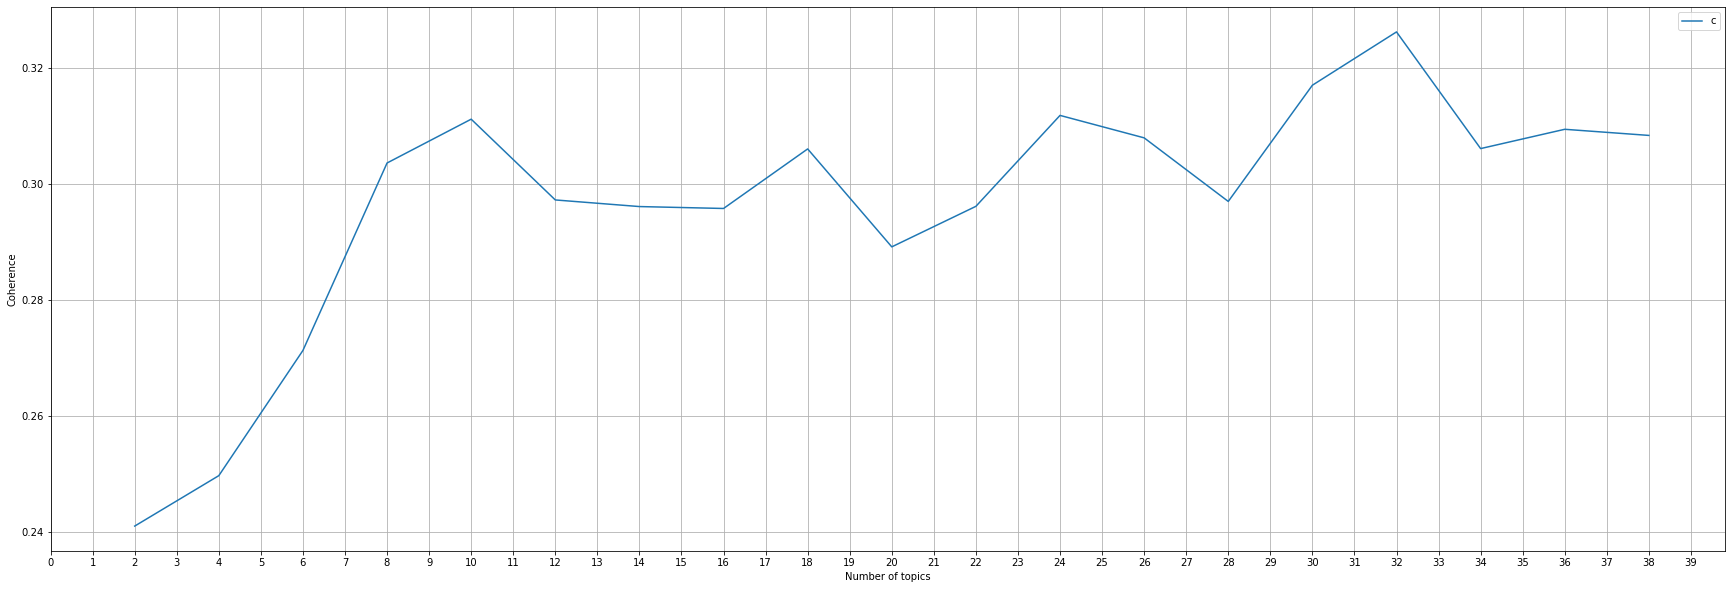

In [20]:
# getting models and coherence values
model_list, coherence_values = compute_coherence(dictionary=dictionary, corpus=corpus, texts=text_stemmed, start=2, limit=40, step=2)

#initalizing parametees
limit = 40
start = 2
step = 2
x = range(start, limit, step)

# making a plot
fig = plt.figure(figsize=(30, 10))
plt.plot(x, coherence_values)

# setting plot parameters
plt.xlabel("Number of topics")
plt.ylabel("Coherence")
plt.grid()
plt.xticks(range(0, 40, 1))
plt.legend(("coherence values"), loc='best')

In [34]:
# saving model 
model_list[15].save('best_model.lda')

# saving dictionary
corpora.Dictionary.save(dictionary, 'dictionary.dict')

# saving corpus
corpora.BleiCorpus.save_corpus(fname='corpus.lda-c', corpus=corpus)

[0,
 3,
 6,
 9,
 12,
 15,
 18,
 21,
 24,
 27,
 30,
 33,
 36,
 39,
 42,
 45,
 48,
 51,
 54,
 57,
 60,
 63,
 66,
 69,
 72,
 75,
 78,
 81,
 84,
 87,
 90,
 93,
 96,
 99,
 102,
 105,
 108,
 111,
 114,
 117,
 120,
 123,
 126,
 129,
 132,
 135,
 138,
 141,
 144,
 147,
 150,
 153,
 156,
 159,
 162,
 165,
 168,
 171,
 174,
 177,
 180,
 183,
 186,
 189,
 192,
 195,
 198,
 201,
 204,
 207,
 210,
 213,
 216,
 219,
 222,
 225,
 228,
 231,
 234,
 237,
 240,
 243,
 246,
 249,
 252,
 255,
 258,
 261,
 264,
 267,
 270,
 273,
 276,
 279,
 282,
 285,
 288,
 291,
 294,
 297,
 300,
 303,
 306,
 309,
 312,
 315,
 318,
 321,
 324,
 327,
 330,
 333,
 336,
 339,
 342,
 345,
 348,
 351,
 354,
 357,
 360,
 363,
 366,
 369,
 372,
 375,
 378,
 381,
 384,
 387,
 390,
 393,
 396,
 399,
 402,
 405,
 408,
 411,
 414,
 417,
 420,
 423,
 426,
 429,
 432,
 435,
 438,
 441,
 444,
 447,
 450,
 453,
 456,
 459,
 462,
 465,
 468,
 471,
 474,
 477,
 480,
 483,
 486,
 489,
 492,
 495,
 498,
 501,
 504,
 507,
 510,
 513,
 516,
